## Alunos

### Caroline Chaim de Lima Carneiro
### Fernando Giuseppe Avila Beltramo

# Entregável 1 - visão computacional


In [65]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.1.1 


# Equalização de histograma

In [66]:
rintin = cv2.imread("RinTinTin.jpg")

In [67]:
rintin.shape

(240, 320, 3)

In [68]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [69]:
rintin_gray.shape

(240, 320)

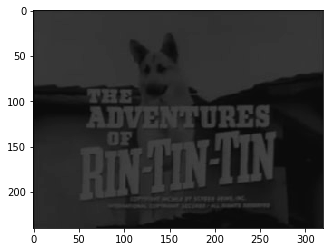

In [70]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

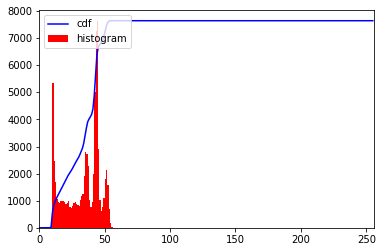

In [71]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [72]:
rintin_teste = rintin_gray

for lista in range(rintin_teste.shape[0]):
    for valor in range(rintin_teste.shape[1]):
        rintin_teste[lista][valor]-=8
        rintin_teste[lista][valor]*=5.1

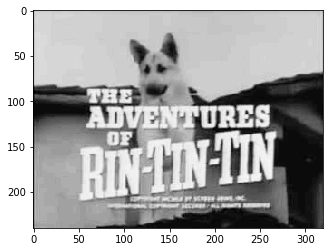

In [73]:
plt.imshow(rintin_teste, cmap="Greys_r", vmin=0, vmax=255)

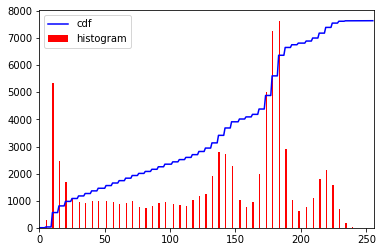

In [74]:

hist,bins = np.histogram(rintin_teste.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_teste.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


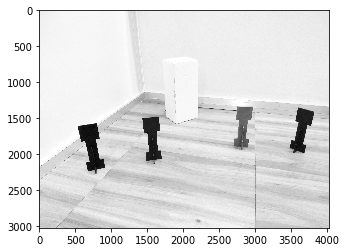

In [75]:
creeper = cv2.imread("cena_canto_sala.jpg")

img_r = creeper[:, :,2]

plt.imshow(img_r, cmap="Greys_r", vmin=0, vmax=255)

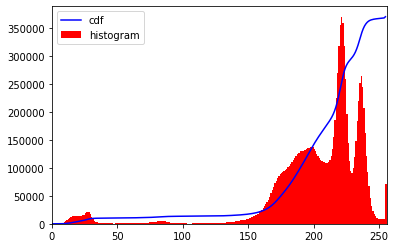

In [76]:

hist,bins = np.histogram(img_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

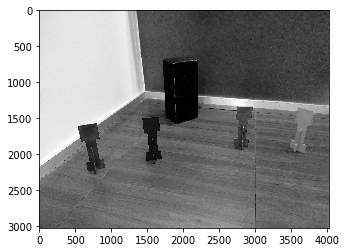

In [77]:
img_b = creeper[:, :,0]

plt.imshow(img_b, cmap="Greys_r", vmin=0, vmax=255)

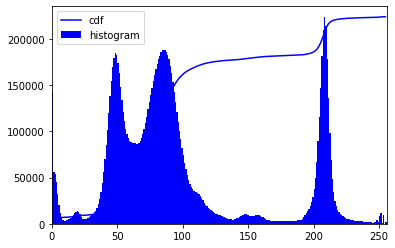

In [78]:

hist,bins = np.histogram(img_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
def scale(valor):
    from math import pi
    return (valor/255.0)*16*pi

saida_b = np.zeros((3024, 4032), dtype=np.uint8)

In [ ]:
from math import cos

for i in range(img_b.shape[0]):
    for j in range(img_b.shape[1]):
        if img_b[i][j] <10:
            saida_b[i][j] = 250
        else:
            saida_b[i][j]=0

In [ ]:
plt.imshow(saida_b, cmap="Greys_r", vmin=0, vmax=255)

In [ ]:
def scale(valor):
    from math import pi
    return (valor/255.0)*16*pi

saida_r = np.zeros((3024, 4032), dtype=np.uint8)

In [ ]:
from math import cos

for i in range(img_r.shape[0]):
    for j in range(img_r.shape[1]):
        if img_r[i][j]>100:
            saida_r[i][j] = 250
        else:
            saida_r[i][j]=0

In [ ]:
plt.imshow(saida_r, cmap="Greys_r", vmin=0, vmax=255)

In [ ]:
def scale(valor):
    from math import pi
    return (valor/255.0)*16*pi

saida_f = np.zeros((3024, 4032), dtype=np.uint8)

In [ ]:
from math import cos

for i in range(img_b.shape[0]):
    for j in range(img_b.shape[1]):
        if img_b[i][j] <10 and img_r[i][j]>100:
            saida_f[i][j] = 250
        else:
            saida_f[i][j]=0

In [ ]:
plt.imshow(saida_f, cmap="Greys_r", vmin=0, vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [ ]:
hall_box = cv2.imread("hall_box_battery_atividade3.png")

In [ ]:
hall_box_G = cv2.cvtColor(hall_box, cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(hall_box_G, cmap="Greys_r", vmin=0, vmax=255)

In [ ]:
hist,bins = np.histogram(hall_box_G.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_box_G.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
hall_box_G.shape

In [ ]:
def scale(valor):
    from math import pi
    return (valor/255.0)*16*pi

saida_b = np.zeros((576, 1024), dtype=np.uint8)

In [ ]:
from math import cos

np.seterr(all='raise')

for i in range(1,hall_box_G.shape[0]-1):
    for j in range(hall_box_G.shape[1]):
        temp = int(hall_box_G[i+1][j])-int(hall_box_G[i-1][j])
        if temp < 0:
            temp = 0
        if temp > 255:
            temp = 255
        saida_b[i][j]= int(temp) 


In [ ]:
plt.imshow(saida_b, cmap="Greys_r", vmin=0, vmax=255)